<a href="https://colab.research.google.com/github/sofa-tsy/HW/blob/Advanced-python/Pandas_Visualization_adv_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv('flight_delays.csv')
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


доля всех задержек ко всем вылетам

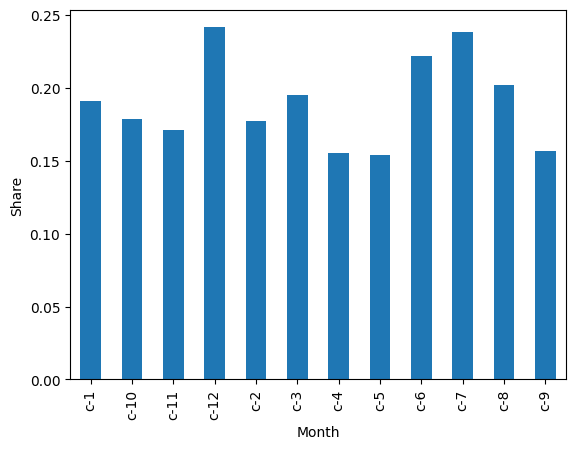

In [129]:
data = df[df['dep_delayed_15min'] == 'Y'].groupby('Month').DepTime.count()
data1 = df.groupby('Month').DepTime.count()
(data/data1).plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Share')
plt.show()

найти зависимость количества задержек от длины пути, который предстоит пролететь самолету

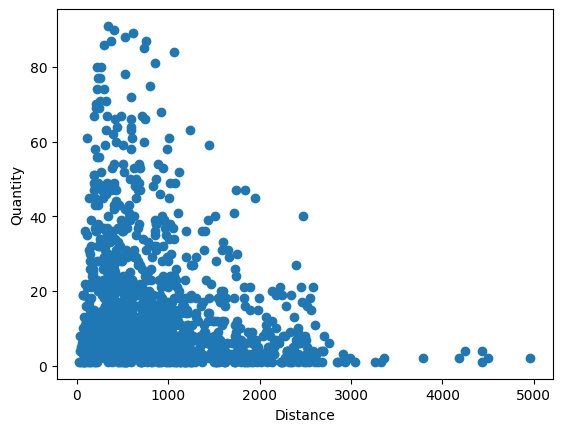

In [87]:
data = pd.Series(df[df['dep_delayed_15min'] == 'Y'].groupby('Distance').Distance.count())
# print(data)
plt.scatter(data.index, data, label='line_1')
plt.xlabel('Distance')
plt.ylabel('Quantity')
plt.show()

топ 5 направлений, для которых чаще всего происходят задержки

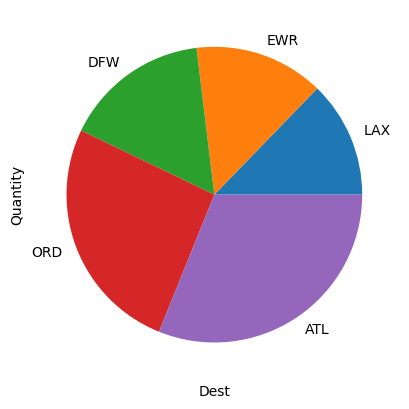

In [130]:
data = df[df['dep_delayed_15min'] == 'Y'].groupby('Dest').Dest.count()
arr = pd.Series(data)
arr = arr.sort_values().tail(5)
arr.plot(kind = 'pie')
plt.xlabel('Dest')
plt.ylabel('Quantity')
plt.show()

в какие времена года чаще всего происходят задержки рейсов

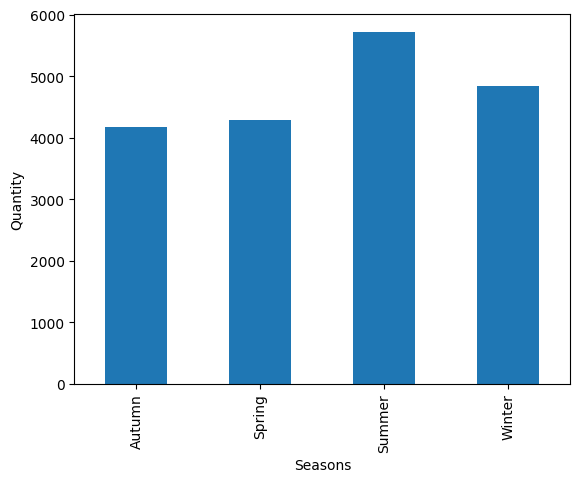

In [144]:
df = pd.read_csv('flight_delays.csv')
for i in range(1, 13, 1):
    if i in [1, 2, 12]:
        df.loc[df["Month"] == 'c-'+str(i), "Month"] = 'Winter'
    elif i in [3, 4, 5]:
        df.loc[df["Month"] == 'c-' + str(i), "Month"] = 'Spring'
    elif i in [6, 7, 8]:
        df.loc[df["Month"] == 'c-'+str(i), "Month"] = 'Summer'
    else:
        df.loc[df["Month"] == 'c-'+str(i), "Month"] = 'Autumn'
d = df.rename(columns={"Month": "Seasons"})
data = d[d['dep_delayed_15min'] == 'Y'].groupby('Seasons').Seasons.count()
arr = pd.Series(data)
arr.plot(kind = 'bar')
plt.xlabel('Seasons')
plt.ylabel('Quantity')
plt.show()

найти топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

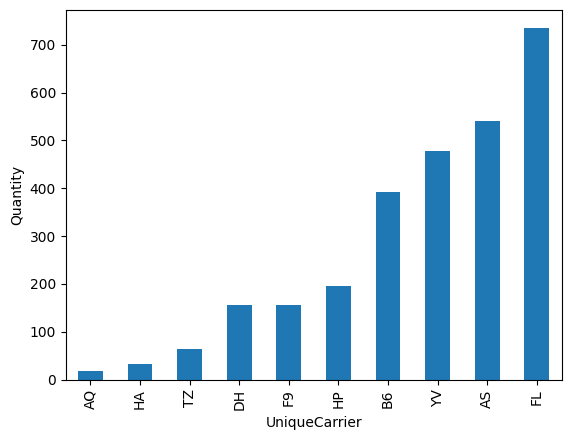

In [127]:
data = df[df['dep_delayed_15min'] == 'Y'].groupby('UniqueCarrier').UniqueCarrier.count()
arr = pd.Series(data)
arr = arr.sort_values().head(10)
arr.plot(kind = 'bar')
plt.xlabel('UniqueCarrier')
plt.ylabel('Quantity')
plt.show()

найти топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

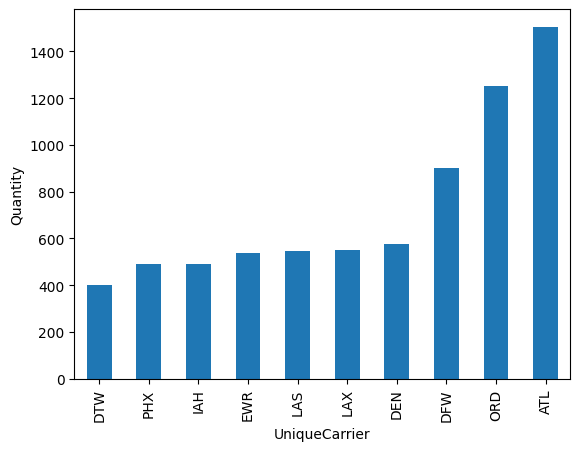

In [128]:
data = df[df['dep_delayed_15min'] == 'Y'].groupby('Origin').Origin.count()
arr = pd.Series(data)
arr = arr.sort_values().tail(10)
arr.plot(kind = 'bar')
plt.xlabel('UniqueCarrier')
plt.ylabel('Quantity')
plt.show()